In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/sample_data/galaxy_data.csv', skiprows=1, sep=',')

# Look at the first few rows
display(df.head())

,specobjid,z,class,zWarning,ra,dec,modelMag_r,modelMag_g,modelMag_i
0,326652842548946944,0.012513,GALAXY,0,189.522249,-0.027031,13.88480,14.72385,13.46923
1,335575929399044096,0.012687,GALAXY,0,203.229693,-1.159457,14.06671,14.67477,13.77084
2,1042697978306914304,0.012523,GALAXY,0,235.077077,-0.812513,16.46258,16.96819,16.23425
3,331025051291772928,0.012773,GALAXY,0,197.859794,-0.249732,13.13354,13.88078,12.76484
4,334411546652338176,0.010793,GALAXY,0,202.355140,-0.399144,15.76987,16.18600,15.62312


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1001 entries, ('specobjid', 'z', 'class', 'zWarning', 'ra', 'dec', 'modelMag_r', 'modelMag_g') to ('2102057930504300544', '0.01036011', 'GALAXY', '0', '116.022965034429', '46.7094984252119', '16.95727', '17.31462')
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #Table1  1001 non-null   object
dtypes: object(1)
memory usage: 262.5+ KB


,#Table1
count,1001
unique,999
top,24.3618
freq,3


In [8]:
df.isnull().sum()
df = df.dropna(subset=['z'])


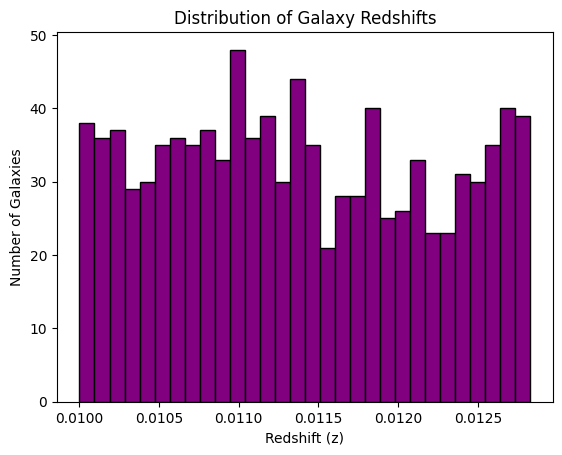

In [9]:
import matplotlib.pyplot as plt

plt.hist(df['z'], bins=30, color='purple', edgecolor='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Galaxy Redshifts')
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('/content/sample_data/galaxy_data.csv', skiprows=1, sep=',')
df = df.dropna(subset=['z'])  # Drop rows with missing redshift
df = df[df['z'] > 0]          # Keep only positive redshifts (moving away)
df.head()

,specobjid,z,class,zWarning,ra,dec,modelMag_r,modelMag_g,modelMag_i
0,326652842548946944,0.012513,GALAXY,0,189.522249,-0.027031,13.88480,14.72385,13.46923
1,335575929399044096,0.012687,GALAXY,0,203.229693,-1.159457,14.06671,14.67477,13.77084
2,1042697978306914304,0.012523,GALAXY,0,235.077077,-0.812513,16.46258,16.96819,16.23425
3,331025051291772928,0.012773,GALAXY,0,197.859794,-0.249732,13.13354,13.88078,12.76484
4,334411546652338176,0.010793,GALAXY,0,202.355140,-0.399144,15.76987,16.18600,15.62312


In [12]:
c = 3e5  # km/s
df['velocity_km_s'] = df['z'] * c


In [13]:
H0_assumed = 70  # km/s/Mpc
df['distance_Mpc'] = df['velocity_km_s'] / H0_assumed


In [14]:
H0_assumed = 70  # km/s/Mpc
df['distance_Mpc'] = df['velocity_km_s'] / H0_assumed


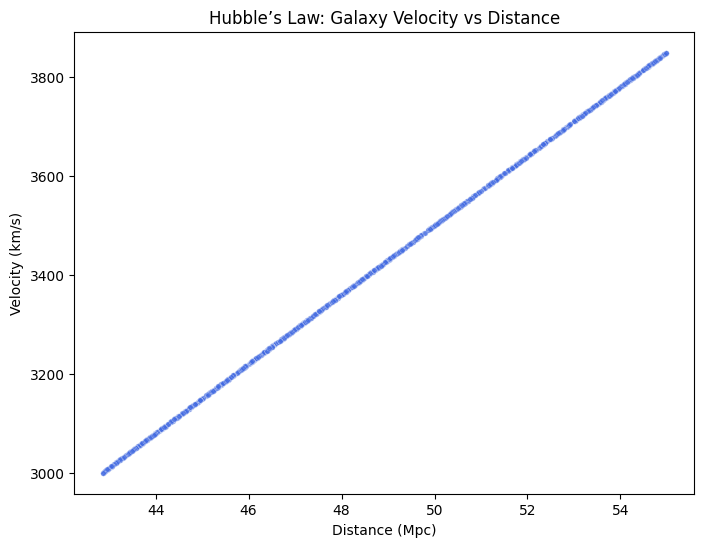

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='distance_Mpc', y='velocity_km_s', data=df, s=15, alpha=0.6, color='royalblue')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Hubble’s Law: Galaxy Velocity vs Distance')
plt.show()


In [16]:
df[['z', 'velocity_km_s', 'distance_Mpc']].describe()


,z,velocity_km_s,distance_Mpc
count,1000.000000,1000.000000,1000.000000
mean,0.011378,3413.313876,48.761627
std,0.000826,247.738722,3.539125
min,0.010000,3000.093000,42.858471
25%,0.010699,3209.731500,45.853307
50%,0.011324,3397.065000,48.529500
75%,0.012086,3625.690500,51.795579
max,0.012830,3848.925000,54.984643


In [17]:
df = df[df['z'] < 0.3]


In [18]:
from sklearn.linear_model import LinearRegression

# Select features and target
X = df[['distance_Mpc']]  # independent variable
y = df['velocity_km_s']   # dependent variable

# Initialize and fit model
model = LinearRegression()
model.fit(X, y)

# Get slope (Hubble constant) and intercept
H0_estimated = model.coef_[0]
intercept = model.intercept_

print(f"Estimated Hubble Constant (H₀): {H0_estimated:.2f} km/s/Mpc")
print(f"Intercept: {intercept:.2f}")


Estimated Hubble Constant (H₀): 70.00 km/s/Mpc
Intercept: 0.00


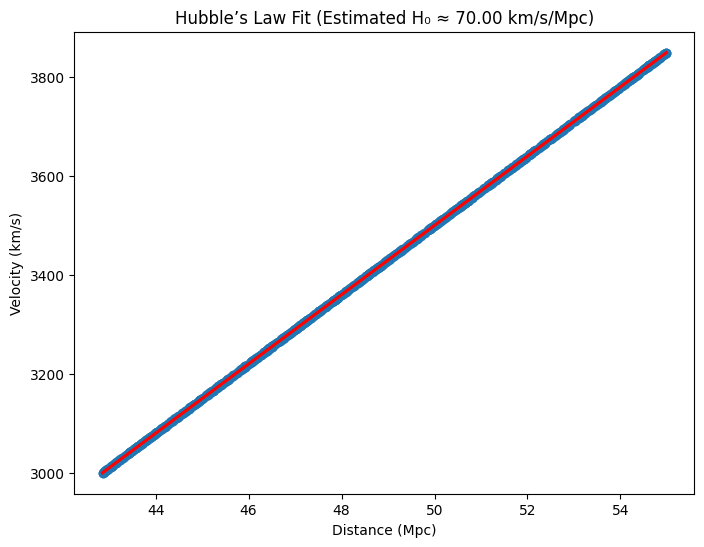

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(x='distance_Mpc', y='velocity_km_s', data=df, line_kws={'color': 'red'})
plt.title(f'Hubble’s Law Fit (Estimated H₀ ≈ {H0_estimated:.2f} km/s/Mpc)')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.show()


In [20]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"Model R² = {r2:.3f}")


Model R² = 1.000


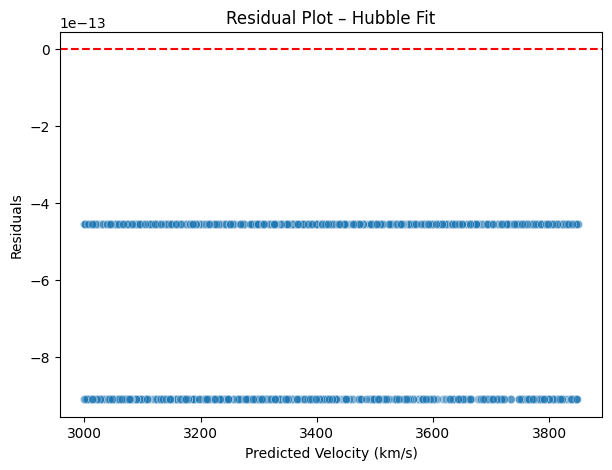

In [21]:
residuals = y - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Velocity (km/s)')
plt.ylabel('Residuals')
plt.title('Residual Plot – Hubble Fit')
plt.show()


In [22]:
print(f"H₀ ≈ {H0_estimated:.2f} km/s/Mpc")
print(f"R² = {r2:.3f}")


H₀ ≈ 70.00 km/s/Mpc
R² = 1.000


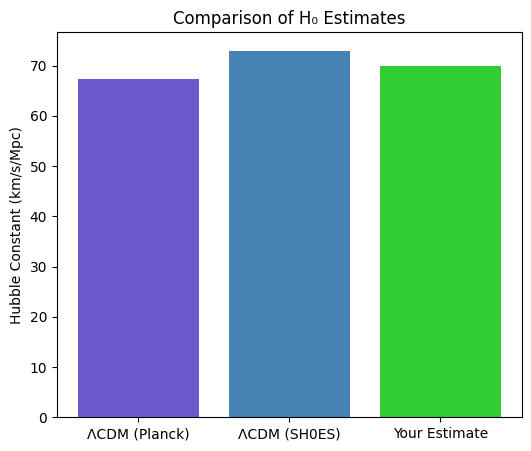

In [23]:
plt.figure(figsize=(6,5))
values = [67.4, 73.0, H0_estimated]
labels = ['ΛCDM (Planck)', 'ΛCDM (SH0ES)', 'Your Estimate']

plt.bar(labels, values, color=['#6A5ACD','#4682B4','#32CD32'])
plt.ylabel('Hubble Constant (km/s/Mpc)')
plt.title('Comparison of H₀ Estimates')
plt.show()


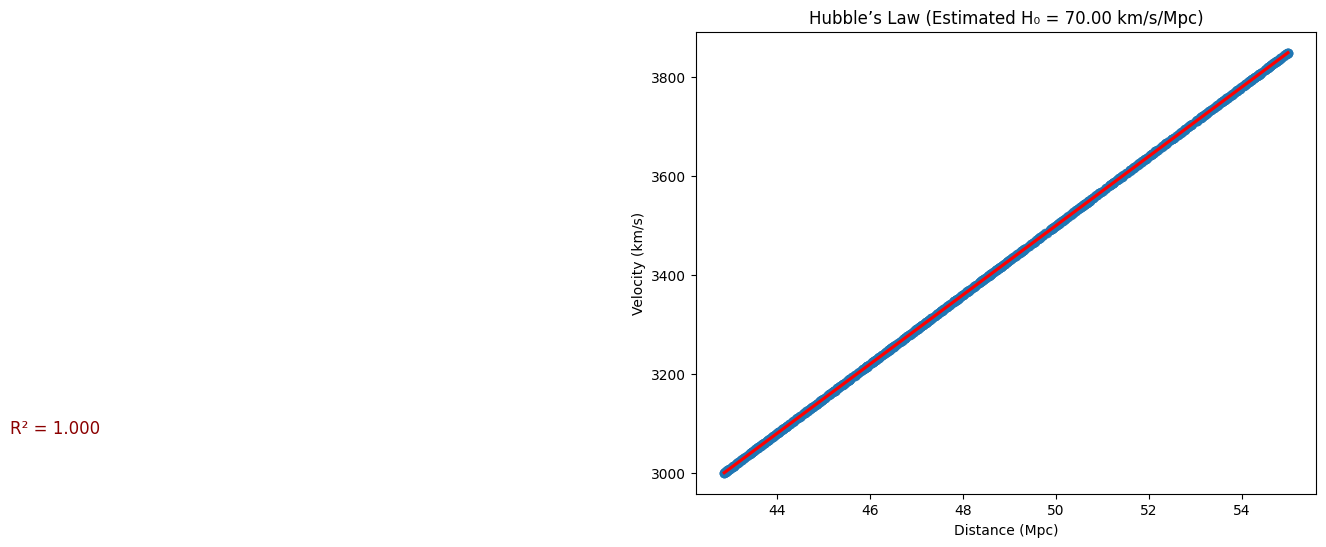

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x='distance_Mpc', y='velocity_km_s', data=df, line_kws={'color': 'red'})
plt.title(f"Hubble’s Law (Estimated H₀ = {H0_estimated:.2f} km/s/Mpc)")
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.text(df['distance_Mpc'].max()*0.5, df['velocity_km_s'].max()*0.8,
         f"R² = {r2:.3f}", fontsize=12, color='darkred')
plt.show()
